<a href="https://colab.research.google.com/github/AkithaPasandul/ML_Workshop/blob/main/ML_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connet to google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
datafram = pd.read_csv('/content/drive/MyDrive/ML-workshop/air_quality_hourly_data_Colombo_METDept.csv')

# **Explore Data**

In [ ]:
datafram.head()

,Unnamed: 0,Time,CO2
0,0,2022-12-21 00:00:00,562
1,1,2022-12-21 01:00:00,511
2,2,2022-12-21 02:00:00,511
3,3,2022-12-21 03:00:00,507
4,4,2022-12-21 04:00:00,498


**Removing the Unnamed colume**

In [ ]:
datafram.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
datafram.head()

,Time,CO2
0,2022-12-21 00:00:00,562
1,2022-12-21 01:00:00,511
2,2022-12-21 02:00:00,511
3,2022-12-21 03:00:00,507
4,2022-12-21 04:00:00,498


**Shape the data**

In [ ]:
print(f"Dataset Shape: {datafram.shape}")

Dataset Shape: (5943, 2)


**Check the missing data**

In [ ]:
print("\nMissing Data:")
print(datafram.isnull().sum())


Missing Data:
Time      0
CO2     212
dtype: int64


**What are the data types of data**

In [ ]:
print("\nData Types:")
print(datafram.dtypes)


Data Types:
Time    object
CO2     object
dtype: object


**Should all value of dataset unique or not**

In [ ]:
datafram.nunique()

,0
Time,5943
CO2,238


# **Cleaning the data**

**Creating copy of data**

In [ ]:
datafram_cleaned = datafram.copy()

**Remove missing value**

In [ ]:
datafram_cleaned.dropna(inplace=True)

In [ ]:
print("\nMissing Data:")
print(datafram_cleaned.isnull().sum())


Missing Data:
Time    0
CO2     0
dtype: int64


**Converting data to correct data type**

In [ ]:
datafram_cleaned['CO2'] = pd.to_numeric(datafram_cleaned['CO2'], errors='coerce')

In [ ]:
datafram_cleaned['Time'] = pd.to_datetime(datafram_cleaned['Time'], format="mixed", errors='coerce')

**More missing values??**

In [ ]:
print(datafram_cleaned.isnull().sum())

Time       0
CO2     2648
dtype: int64


In [ ]:
datafram_cleaned.dropna(inplace=True)

In [ ]:
print(datafram_cleaned.isnull().sum())

Time    0
CO2     0
dtype: int64


In [ ]:
print("Data After cleaning:", datafram_cleaned.shape)

Data After cleaning: (3083, 2)


# **Visualize the Data**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

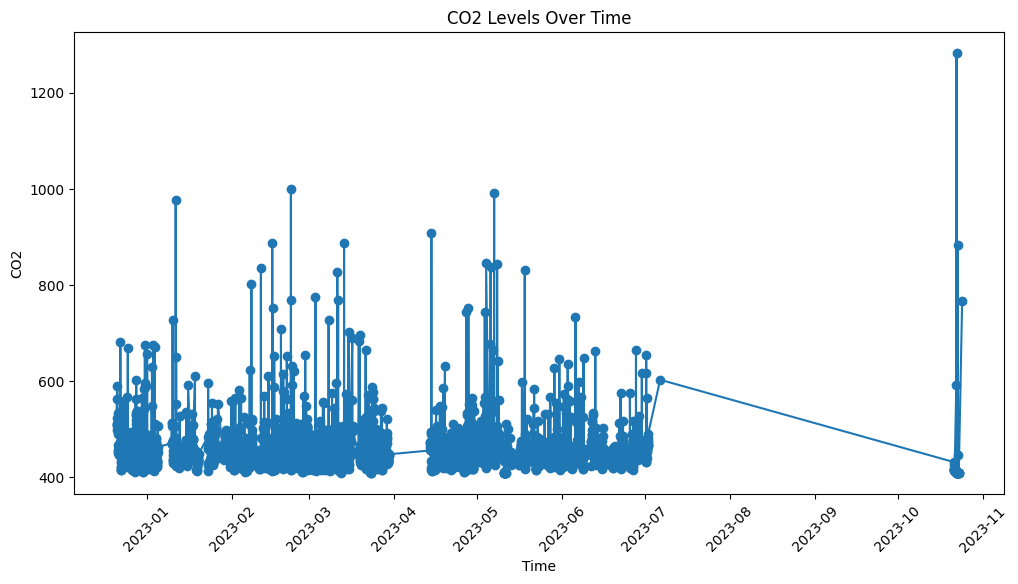

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(datafram_cleaned['Time'],datafram_cleaned['CO2'],marker='o')
plt.xlabel('Time')
plt.ylabel('CO2')
plt.title('CO2 Levels Over Time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
datafram_cleaned['TimeDelta'] = datafram_cleaned['Time'].diff() #finding every difference of colume

In [ ]:
datafram_cleaned

,Time,CO2,TimeDelta
0,2022-12-21 00:00:00,562.0,NaT
1,2022-12-21 01:00:00,511.0,0 days 01:00:00
2,2022-12-21 02:00:00,511.0,0 days 01:00:00
3,2022-12-21 03:00:00,507.0,0 days 01:00:00
4,2022-12-21 04:00:00,498.0,0 days 01:00:00
...,...,...,...
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00
3294,2023-10-23 07:00:00,410.0,0 days 01:00:00


**Get all colume that time difference is 1 hour**

In [ ]:
continueous_rows = datafram_cleaned.copy()
continueous_rows = continueous_rows[continueous_rows['TimeDelta'] == pd.Timedelta(hours=1)]
continueous_rows

,Time,CO2,TimeDelta
1,2022-12-21 01:00:00,511.0,0 days 01:00:00
2,2022-12-21 02:00:00,511.0,0 days 01:00:00
3,2022-12-21 03:00:00,507.0,0 days 01:00:00
4,2022-12-21 04:00:00,498.0,0 days 01:00:00
5,2022-12-21 05:00:00,591.0,0 days 01:00:00
...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00


**According to the graph indentifying all clumps ("important"**)

In [ ]:
continueous_rows['index_diff'] = continueous_rows.index.diff()
continueous_rows

,Time,CO2,TimeDelta,index_diff
1,2022-12-21 01:00:00,511.0,0 days 01:00:00,NaN
2,2022-12-21 02:00:00,511.0,0 days 01:00:00,1.0
3,2022-12-21 03:00:00,507.0,0 days 01:00:00,1.0
4,2022-12-21 04:00:00,498.0,0 days 01:00:00,1.0
5,2022-12-21 05:00:00,591.0,0 days 01:00:00,1.0
...,...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00,1.0
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00,1.0
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00,1.0
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00,1.0


**Grouping the clumps**

In [ ]:
continueous_rows['group'] = (continueous_rows['index_diff'] != 1).cumsum()
continueous_rows

,Time,CO2,TimeDelta,index_diff,group
1,2022-12-21 01:00:00,511.0,0 days 01:00:00,NaN,1
2,2022-12-21 02:00:00,511.0,0 days 01:00:00,1.0,1
3,2022-12-21 03:00:00,507.0,0 days 01:00:00,1.0,1
4,2022-12-21 04:00:00,498.0,0 days 01:00:00,1.0,1
5,2022-12-21 05:00:00,591.0,0 days 01:00:00,1.0,1
...,...,...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00,1.0,123
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00,1.0,123
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00,1.0,123
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00,1.0,123


**Identify group with the most amout of data**

In [ ]:
largest_group = continueous_rows['group'].value_counts().idxmax()

In [ ]:
largest_group

4

In [ ]:
largest_continueous_data = continueous_rows[continueous_rows['group'] == largest_group]

In [ ]:
largest_continueous_data

,Time,CO2,TimeDelta,index_diff,group
53,2022-12-23 06:00:00,457.0,0 days 01:00:00,3.0,4
54,2022-12-23 07:00:00,463.0,0 days 01:00:00,1.0,4
55,2022-12-23 08:00:00,469.0,0 days 01:00:00,1.0,4
56,2022-12-23 09:00:00,545.0,0 days 01:00:00,1.0,4
57,2022-12-23 10:00:00,442.0,0 days 01:00:00,1.0,4
...,...,...,...,...,...
273,2023-01-01 10:00:00,466.0,0 days 01:00:00,1.0,4
274,2023-01-01 11:00:00,447.0,0 days 01:00:00,1.0,4
275,2023-01-01 12:00:00,431.0,0 days 01:00:00,1.0,4
276,2023-01-01 13:00:00,418.0,0 days 01:00:00,1.0,4


**Create the graph**

In [ ]:
largest_group_data = largest_continueous_data.drop(['index_diff', 'group'], axis=1)

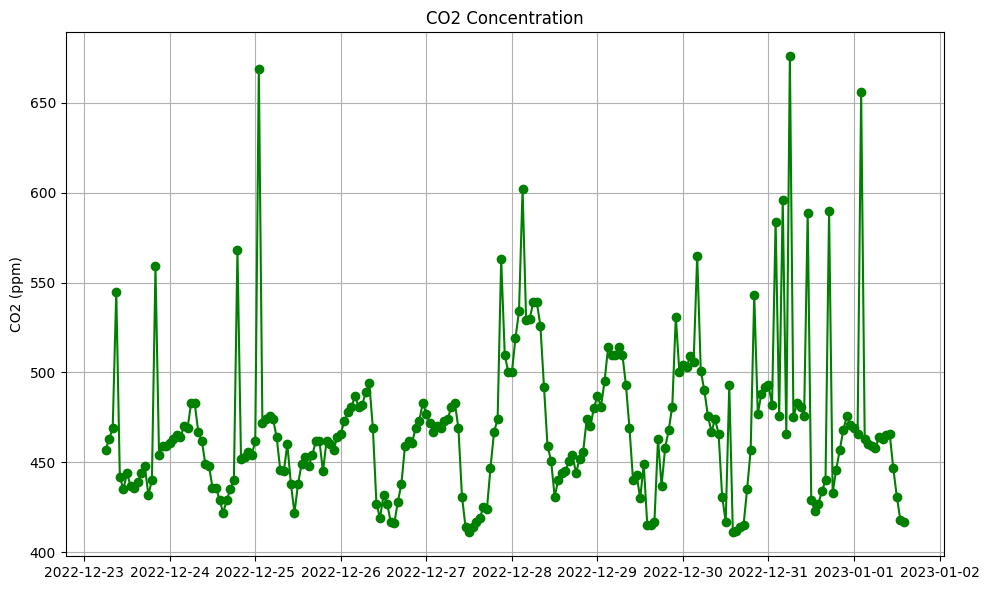

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.plot(largest_group_data['Time'], largest_group_data['CO2'], color='green', marker='o')
axs.set_title('CO2 Concentration')
axs.set_ylabel('CO2 (ppm)')
axs.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
largest_continueous_data.shape

(225, 5)

In [ ]:
(len(largest_continueous_data)/len(datafram_cleaned))*100

7.298086279597794

# **Train ML model**

In [ ]:
from os import pipe
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


df = largest_group_data.copy()

df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour

x = df[['year', 'month', 'day', 'hour']]
y = df['CO2']

split_point = int(len(x) * 0.8)

x_train, x_test = x[:split_point], x[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
}


results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    tscv = TimeSeriesSplit(n_splits=5)
    scores = cross_val_score(pipe, x_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'Cross-val MSE': -np.mean(scores),
        'Test MSE': mse,
        'Test R2': r2
    }


for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


best_model = min(results, key=lambda x: results[x]['Test MSE'])
print(f"\nBest model based on Test MSE: {best_model}")



Linear Regression:
  Cross-val MSE: 1448.9454
  Test MSE: 3782.5027
  Test R2: -0.0951

Random Forest:
  Cross-val MSE: 1273.0261
  Test MSE: 3280.2529
  Test R2: 0.0503

XGBoost:
  Cross-val MSE: 1589.1661
  Test MSE: 3758.9011
  Test R2: -0.0882

Best model based on Test MSE: Random Forest


# Can we do better

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt
from warnings import catch_warnings, filterwarnings
filterwarnings("ignore")


def predict_co2_levels(df, forecast_horizon=10):
    """
    Predict CO2 levels using ARIMA model.

    Parameters:
    df (pandas.DataFrame): DataFrame with 'Time' and 'CO2' columns
    forecast_horizon (int): Number of future time points to predict

    Returns:
    tuple: (predictions, mse, rmse)
    """

    df = df.sort_values('Time')


    df.set_index('Time', inplace=True)

    model = ARIMA(df['CO2'], order=(1,1,1))
    results = model.fit()

    predictions = results.forecast(steps=forecast_horizon)

    # Calculate Mean Squared Error and Root Mean Squared Error
    mse = mean_squared_error(df['CO2'][-forecast_horizon:], predictions)

    return predictions, mse

predictions, mse, = predict_co2_levels(largest_group_data)
# print(f"Predictions: {predictions}")
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 893.2996221434248


# Can you do even better!!

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbltpuito/wqu7b5xw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbltpuito/opo5h84u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35930', 'data', 'file=/tmp/tmpbltpuito/wqu7b5xw.json', 'init=/tmp/tmpbltpuito/opo5h84u.json', 'output', 'file=/tmp/tmpbltpuito/prophet_modelq1tzjjfn/prophet_model-20240913040552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:05:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:05:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


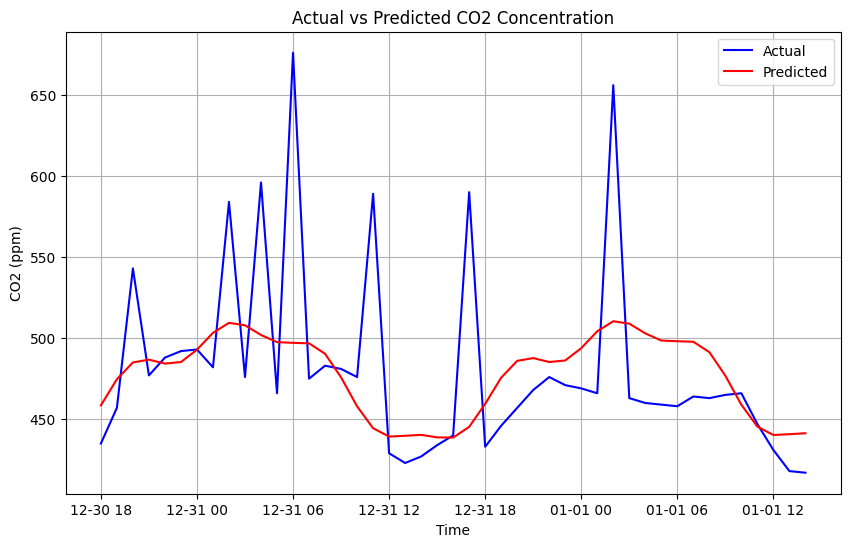

Root Mean Squared Error (RMSE): 54.452076807335985


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with the data, and it contains the 'Time' and 'CO2' columns

# Prepare the data for the Prophet model
df_prophet = largest_continueous_data[['Time', 'CO2']].rename(columns={'Time': 'ds', 'CO2': 'y'})

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
train_data = df_prophet[:train_size]
test_data = df_prophet[train_size:]

# Create and fit the Prophet model with the training data
model = Prophet()
model.fit(train_data)

# Make predictions on the test data
forecast = model.predict(test_data[['ds']])

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], test_data['y'], label='Actual', color='blue')
plt.plot(test_data['ds'], forecast['yhat'], label='Predicted', color='red')
plt.title('Actual vs Predicted CO2 Concentration')
plt.xlabel('Time')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
mse = mean_squared_error(test_data['y'], forecast['yhat'])
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

## Root Mean Square Error(We need mse not rmse)

In [ ]:
mse

2965.0286686320173

# **Metrics for predict CO2 value**

In [ ]:
def directional_accracy(actual, predicted):
  actual_diff = np.diff(actual)
  predicted_diff = np.diff(predicted)
  correct_direction = np.sign(actual_diff) == np.sign(predicted_diff)
  accuracy = np.mean(correct_direction)
  return accuracy
